In [1]:
# Importing libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Importing data set
path = r'C:\Users\nodnarb\Documents\Electric Vehicles Project'
df = pd.read_csv(os.path.join(path, '01 Data', 'kc_house_data.csv'))

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### 1. Cleaning data

In [5]:
# Creating subset for time anaylsis with date and average property price
df1 = df.groupby('date')['price'].mean().reset_index()

In [6]:
df1.head()

,date,price
0,20140502T000000,526251.492537
1,20140503T000000,466970.000000
2,20140504T000000,576690.000000
3,20140505T000000,580938.607143
4,20140506T000000,534047.903614


In [7]:
# Checking for missing values
df1.isnull().sum()

date     0
price    0
dtype: int64

In [8]:
# Convert date to correct format
df1['date'] = pd.to_datetime(df1['date'])

In [9]:
df1.dtypes

date     datetime64[ns]
price           float64
dtype: object

#### 2. Line chart

In [11]:
# Set the "Date" column as the index

from datetime import datetime

df1['datetime'] = pd.to_datetime(df1['date']) # Create a datetime column from "Date.""
df1 = df1.set_index('datetime') # Set the datetime as the index of the dataframe.
df1.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
df1.head()

,price
datetime,
2014-05-02,526251.492537
2014-05-03,466970.000000
2014-05-04,576690.000000
2014-05-05,580938.607143
2014-05-06,534047.903614


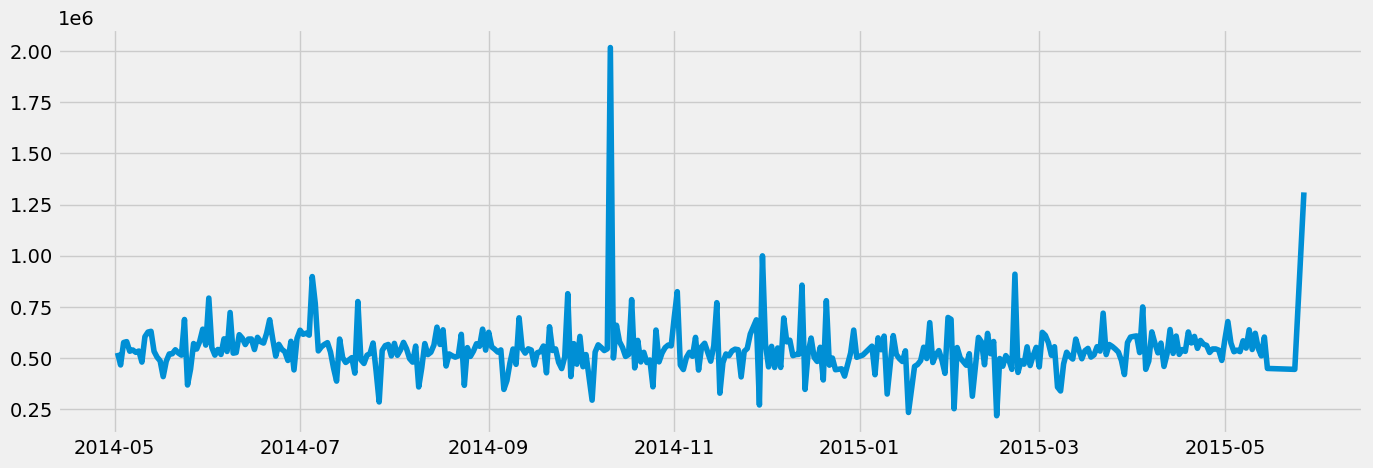

In [12]:
# Plot the data
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df1)

#### 3. Decomposition

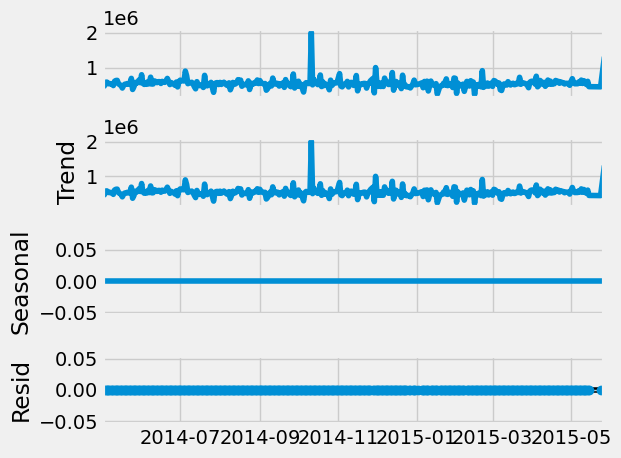

In [27]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df1, model='additive', period=1)
decomposition.plot()
plt.show()

There does not seem to be a trend among the data. 

Seasonality does not exist within the data.

There is no unexplained noise in the data except minimal noise in May 2015. 

#### 4. Testing for stationarity

In [32]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df1['price'])

Dickey-Fuller Stationarity test:
Test Statistic                 -19.296141
p-value                          0.000000
Number of Lags Used              0.000000
Number of Observations Used    371.000000
Critical Value (1%)             -3.448100
Critical Value (5%)             -2.869362
Critical Value (10%)            -2.570937
dtype: float64


Null hypothesis: root unit exists

Alternative hypthesis: root unit does not exist

The test statistic is lower than the critical value of 1%, 5% and 10% and a satisfactory p-value of <0.05, meaning that a root unit does not exist and rejecting the null hypothesis. The data series is stationary. 

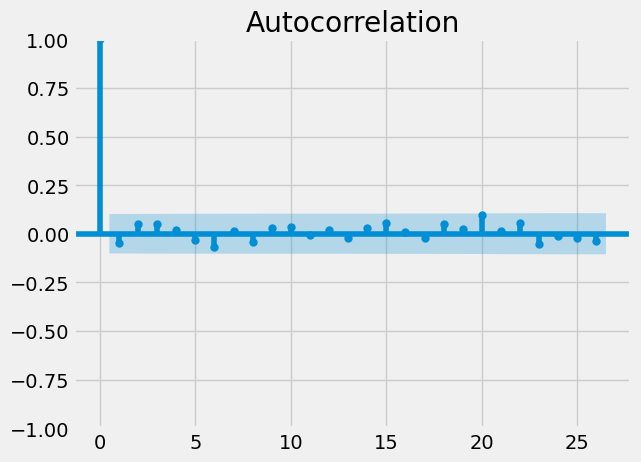

In [34]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df1)
plt.show()